# Lab 7 Notebook
written by Corey Beard ccbeard@uci.edu

This notebook will attempt to simulate Physics 52C Lab 6 related to the Rydberg Constant. 

Certain cells will be editable, and are meant to mimic students adjusting settings on laboratory equipment. Certain cells are uneditable, and are meant to simulate nature, producing values as read by your instrument, depending on your settings.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as optimization

# Main Function

This next cell is a function that simulates some of the physics in this lab, as well as plots the spectra for you. **It should not be edited.**

In [15]:
dlab = 10**(-5) #distance between slits in diffraction grating

def diffraction(dlab,wavelength,n=1):
    theta = np.arcsin(n*wavelength*10**(-9)/dlab)
    dist = 0.1*np.tan(theta)
    return dist


#Create a function that spits out the lines depending on lamp, grating, etc
def get_lines(dlab,lamp):
   
    xdistance = []
    if lamp == 'Mercury':
        alphas=[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
        colors = ['violet','violet','blue','cyan','green','yellow','yellow','orange','red']
        mercwav = [404.7,407.8,435.8,491.6,546.1,577.0,579.0,615.2,623.4]
        for n in range(9):
            xdistance.append(diffraction(dlab,wavelength=mercwav[n]))
            
            
    if lamp == 'Hydrogen':
        alphas = [0.4,0.3,0.2,0.3,0.2,0.1,0.8,0.7,0.6]
        colors = ['violet','violet','violet','blue','blue','blue','red','red','red']
        hywav = [434.0,486.1,656.3]
        for n in range(len(hywav)):
            for j in range(3):
                xdistance.append(diffraction(dlab,wavelength=hywav[n],n=j+1))
            
            
    
    #plot our distances
    plt.figure(figsize=(20,5))
    for i in range(len(xdistance)):
        plt.axvspan(xdistance[i]-thickness,xdistance[i]+thickness, alpha=alphas[i], color=colors[i])
        plt.axvspan(-xdistance[i]-thickness,-xdistance[i]+thickness, alpha=alphas[i], color=colors[i])
    plt.xlim(xplotstart,xplotend)
    plt.title('Lines of '+ lamp,fontsize=20)
    plt.xlabel('Distance from Center of Diffraction Pattern (m)',fontsize=15)
    
    plt.show()

# 7.3.2 Preliminaries

We're going to start off our experiment by calibrating our setup. We'll start with a Mercury lamp. You'll want to use the next cell to adjust a couple of settings: the thickness of the lines (feel free to play around with numbers and see what happens), as well as the limits of the plot function. A brief description of each setting is available next to it.

In [16]:
#Define some variables
thickness = 0.00001 #this is a "focus" adjustor that affects how thick the lines are, in meters
xplotstart = None #The lower x value you will use when plotting the lines, if you want to zoom in
xplotend = None #The upper x value you will use when plotting the lines, if you want to zoom in
lamp = 'Mercury' #which lamp are you using. For this section it should be Mercury.

Now, calibrate your setup by measuring the distance from the center to one of the first order lines of Mercury. Compare this to theory, and make sure it agrees. Running the cell below will show an output of what you would expect to see during the experiment. Feel free to adjust the xplot settings above to zoom in on a part, if you're trying to make measurements.

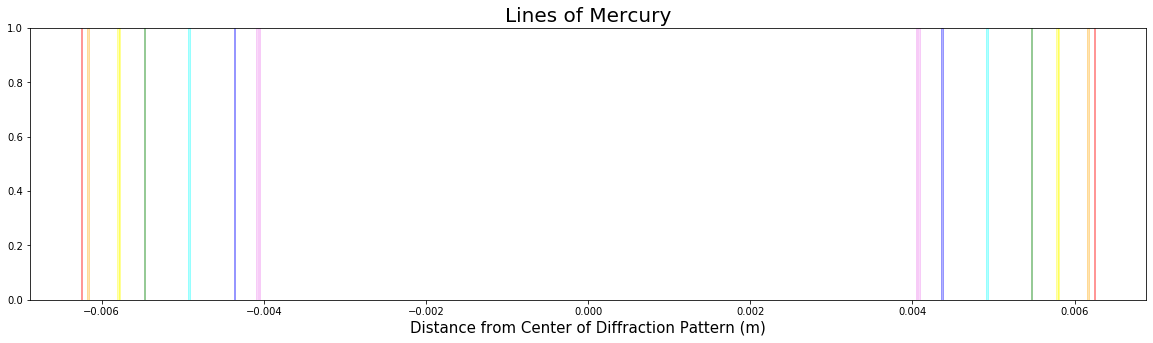

In [17]:
xplotstart = None
xplotend = None
get_lines(dlab,lamp)

Note that to calculate the angle $\theta$ the distance between the telescope and the source is 0.1m. Thus, we can convert any x value measured from the spectrum above to any line using the formula: $\theta=arctan(x/0.1)$ where $x$ is in meters.

Write your measured $x$ value and compare against the predicted $x$ value for one of the first order lines - say cyan - in the cell below. 

The predicted line is based on $d=10^{-5}$ m. Mercury line wavelengths are given in Table 7.1 in Angstroms. Note 1 Angstrom = 10$^{-10}$ m.

In [18]:
#for cyan - Table identifies as turquoise, 4916 A = 491.6 nm
xpredicted=0.1*np.tan(np.arcsin(491.6*1e-9/1e-5))
print(xpredicted)

0.0049219510509934325


Measure as best as you can and write below the x value of same line and compare to the prediction.

In [19]:
xmeasured = 0.0049 #for cyan

**Finally, adjust the thickness until you can make out the yellow doublet (two nearby yellow lines that appear as one). If you cannot see both yellow lines, adjust the thickness until you can.**

# 7.3.3 Grating Calibration

Now we will measure the diffraction grating distance $d$ to high accuracy. Measure the distance from the center of the diffraction pattern to each first order line, on the right (plus values) and the left (minus values) side. 

These $x$ values (in meters) can be converted to $\theta$ (in radians) with $x=0.1*tan(\theta)$. Use this to obtain $\theta$ values corresponding to two $x$ values (plus and minus) for each line, convert to degrees.


$\theta$ can be obtained from the two values as $\theta=1/2*(\theta_+ - \theta_{-})$ in degrees. 

**The table should have columns titled color, order, $\theta_{+}$, $\theta_{-}$, $\theta$, $\lambda$, and d.** 

Use table 7.1 in the lab manual to determine wavelength's from color, and use Eq 7.11 to infer the grating spacing d.

In [20]:
color = ['violet','violet','blue','cyan','green','yellow','yellow','orange','red']
lam = [404.7,407.8,435.8,502.5,546.1,577.0,579.0,615.2,623.4]  #from Table 7.1
order = [1,1,1,1,1,1,1,1,1]

#enter your x values here corresponding to each line.

xplus = np.array([0.00404,0.00405,0.00437,0.00502,0.00545,0.00579,0.0058,0.00615,0.00622])
xminus = np.array([-0.00402,-0.00401,-0.00435,-0.00500,-0.00543,-0.00577,-0.0056,-0.00612,-0.00620])

# x values to theta calculation is done here.

thetaplus=np.arctan(xplus/0.1)*180/np.pi   # in degrees
thetaminus=np.arctan(xminus/0.1)*180/np.pi  #in degrees

# we also do the average
theta=np.array(0.5*(thetaplus-thetaminus))

print(theta)

[2.30777109 2.30777102 2.49651484 2.86812046 3.11382116 3.30801545
 3.26232614 3.51069586 3.55350464]


Now convert to $d$ for each line using Eq. 7.11. (Feel free to use python line to do this calculation or use a calculator and enter values). Fill in this array with calculated $d$ values. It is left blank for now.

In [21]:
d = []

In [22]:
table = pd.DataFrame([color,order,thetaplus,thetaminus,theta,lam,d])
table = table.transpose()
table = table.rename(columns={0:'Color',1:'Order',2:'$\theta_{+}$ (degrees)',3:'$\theta_{-}$ (degrees)',4:'$\theta$ (degrees)',5:'Wavelength (nm)',6:'Calculated d'})

table


,Color,Order,$\theta_{+}$ (degrees),$\theta_{-}$ (degrees),$\theta$ (degrees),Wavelength (nm),Calculated d
0,violet,1,2.31349,-2.30205,2.30777,404.7,None
1,violet,1,2.31921,-2.29633,2.30777,407.8,None
2,blue,1,2.50223,-2.4908,2.49651,435.8,None
3,cyan,1,2.87384,-2.86241,2.86812,502.5,None
4,green,1,3.11953,-3.10811,3.11382,546.1,None
5,yellow,1,3.31373,-3.3023,3.30802,577,None
6,yellow,1,3.31944,-3.20522,3.26233,579,None
7,orange,1,3.51926,-3.50213,3.5107,615.2,None
8,red,1,3.55921,-3.5478,3.5535,623.4,None


Determine the average value of d, and the standard deviation of your data.

# 7.3.4 The Balmer Spectrum

Now we will measure the Balmer spectrum, the first few lines visible using a Hydrogen lamp. Change the lamp variable to Hydrogen (make sure it's surround by ''), and run the function again.

In [23]:
#Instrument settings
thickness = 0.00005 #this is a "focus" adjustor that affects how thick the lines are, in meters
xplotstart = None #The lower x value you will use when plotting the lines, if you want to zoom in
xplotend = None #The upper x value you will use when plotting the lines, if you want to zoom in
lamp = 'Hydrogen' #which lamp are you using

Run the next cell to get an output of what you expect to see in the lab room:

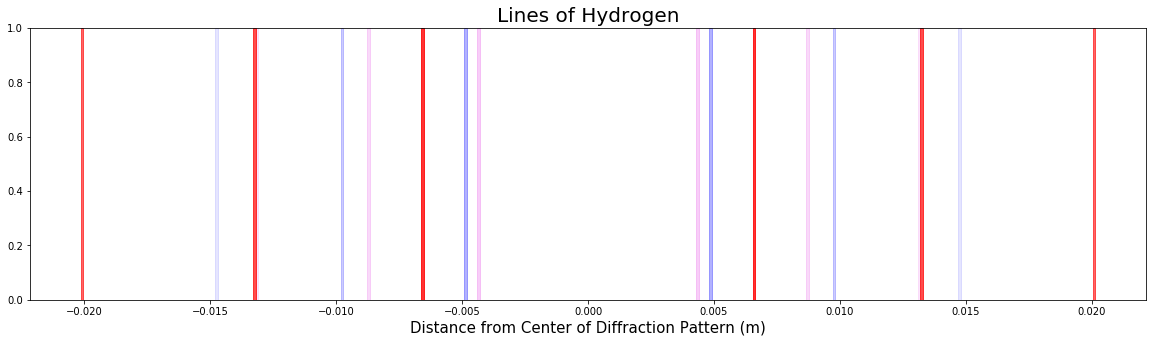

In [24]:
get_lines(dlab,lamp)

Now, create another table with similar headings as the Mercury lamp: **The table should have columns titled color, order, $\theta_{+}$, $\theta_{-}$, $\theta$, and $\lambda$.** 

Section 7.3.4 recommends that you use lines from many orders as possible. We recommend at least to order 3. There should be 3 lines clearly visible, H$\alpha$, H$\beta$, H$\gamma$. One of the lines is likely only seen till the second order.

While the exact wavelengths of these lines are known, the intent of the lab is to measure these line wavelengths using the spectrum. 

Here for this table $\lambda$ is the value derived from the measurements, using $d$ from the end of 7.3.3
and $n=1,2,3$ for the order and $\theta$ from the spectrum (converted from $x$).

# 7.3.5 Rydberg Constant

Using your measurements from the previous section, including the average value of grating spacing $d$ from Mercury lines, find the **mean value of $\lambda$ and the standard deviation**, for each of the three colors or the three main lines of the Balmer spectrum.

**Now Use your values to calculate the Rydberg constant for each of the three lines using eq. 7.10:**

In [ ]:
R1 =
R2 = 
R3 =

There are two sources of uncertainty in these calculations: the error in the measurement of the distance from the center, and the error in the size of the diffraction grating. Using their values and added in quadrature using fractional uncertainties (see lab book, page 72), calculate the error in your measurement of each Rydberg constant:

Use equations 7.10 - 7.12 in *An Introduction to Error Analysis* to calculate the weighted average and uncertainty in the final $R_H$.

Compare the measured value of $R_H$ with the accepted value.

# 7.4 Reflection Questions

1. For a spectrometer, what is the advantage of a narrow slit? Of a wide slit?

2. What properties of the mercury lamp make it a convenient calibration source for the grating?

3. In section 7.3.3, identify a possible source of systematic error in your calculation of d. Does this error affect your measurement, or does it tend to cancel out when calculating d?

4. Compare your weighted average calculations with the values of $R_{H}$ that you calculated from the red, turqoise, and violet lines. Did performing a weighted average improve your agreement with the accepted value of $R_{H}$?

# 7.4 Extra credit

This analysis is optional but worth 10 extra points.

You can use python (will need to write a small amount of code) or this can be done with excel or any other computer software or program that allows plotting (or even a graphing calculator).
You are welcome to use any plotting software i.e. excel, mathematica, python, to do so.  Insert an image of your graph below or upload a separate image to Canvas.

If you are using Python feel free to use example codes from Lab 5 or 6 for linear model fits to data.

1. We can re-write 
\begin{equation} \frac{1}{\lambda}=R_H\left(\frac{1}{4}-\frac{1}{n_u^2}\right) \end{equation}
for the experiment in linear form $y=A+B*x$ by using $A=0$, $B=R_H$ when $y=1/\lambda$ and $x=\left(\frac{1}{4}-\frac{1}{n_u^2}\right)$.

Plot your data in linearized form above (should have 3 data points and an error in the $y$ value).
Compute the Rydberg constant (and error) from your data using a weighted (pages 198-199 in Taylor) or unweighted fit (pages 197-198 in Taylor) to the straight line. 

Use space below for the analysis.

Does the value through the line fit agree with the one you calculated above as a separare estimate for each line and the average? Why or why not?